# 坐标直线距离计算方法

## math 坐标计算两点之间的距离（公式）

In [1]:
from math import radians, cos, sin, asin, sqrt
#公式计算两点间距离（m）
def distance_from_longlat_asmath_function(lng1 = 120.12802999999997,lat1 = 30.28708,lng2=115.86572000000001,lat2 = 28.7427):
    lng1, lat1, lng2,lat2 = map(radians, [float(lng1), float(lat1), float(lng2), float(lat2)])
    dlon = lng2 - lng1
    dlat = lat2 - lat1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2 
    mean_radius_of_earth = 6371 * 1000
    distance = 2*asin(sqrt(a))* mean_radius_of_earth
    return  distance/1000


distance_from_longlat_asmath_function(120.12802999999997,30.28708,115.86572000000001,28.7427)

446.7207270095996

## numpy计算坐标两点之间的距离

In [2]:
import numpy as np

def distance_from_longlat_asnumpy_function(lng1,lat1,lng2,lat2,unit='km'):
    to_randians = lambda x : np.radians(float(x))
    lng1,lat1,lng2,lat2 = map(to_randians,(lng1,lat1,lng2,lat2))
    dlon , dlat = lng2 - lng1,lat2-lat1
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2 
    mean_radius_of_earth = 6371 * 1000
    distance = 2*np.arcsin(np.sqrt(a))* mean_radius_of_earth
    if unit == "km":
        return distance/1000
    else:
        return distance
    
    
a = distance_from_longlat_asnumpy_function(120.12802999999997,30.28708,115.86572000000001,28.7427)-distance_from_longlat_asnumpy_function(120.12802999999997,30.28708,89,34)
b = distance_from_longlat_asnumpy_function(120.12802999999997,30.28708,115.86572000000001,28.7427)-distance_from_longlat_asnumpy_function(120.12802999999997,30.28708,89,34.2345)
a,b

(-2501.5158011725957, -2501.344210659919)

In [3]:
case_distance = distance_from_longlat_asnumpy_function(120.12802999999997,30.28708,115.86572000000001,28.7427)
case_distance

446.7207270095996

## 通过梯度场直观感受梯度

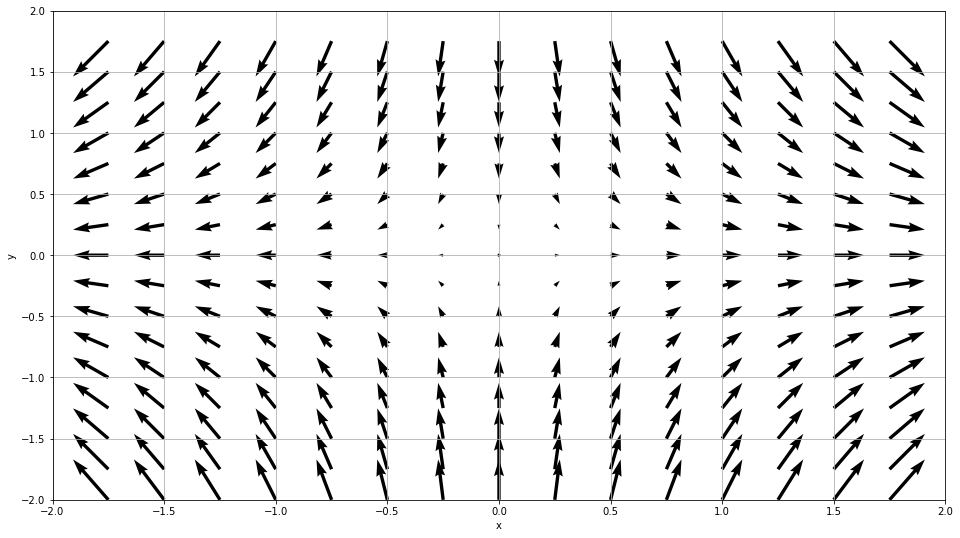

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def f(x,y):
    return x**2-y**2

def grad_x(f,x,y):
    h = 1e-4
    return (f(x + h/2,y)-f(x-h/2,y)) / h

def grad_y(f,x,y):
    h = 1e-4
    return (f(x,y + h/2 ) - f(x,y - h/2)) / h

def numerical_gradient(f,P):
    grad = np.zeros_like(P)
    for i in range(P[0].size):
        grad[0][i] = grad_x(f,P[0][i],P[1][i])
        grad[1][i] = grad_y(f,P[0][i],P[1][i])
    return grad

x = np.arange(-2,2,0.25)
y = np.arange(-2,2,0.25)

X,Y = np.meshgrid(x,y)
X = X.flatten()
Y = Y.flatten()

grad = numerical_gradient(f,np.array([X,Y]))

plt.figure(figsize=(16,9))
plt.quiver(X,Y,grad[0],grad[1])
plt.xlim([-2,2])
plt.ylim([-2,2])
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.show()

## 通过梯度场直观感受梯度

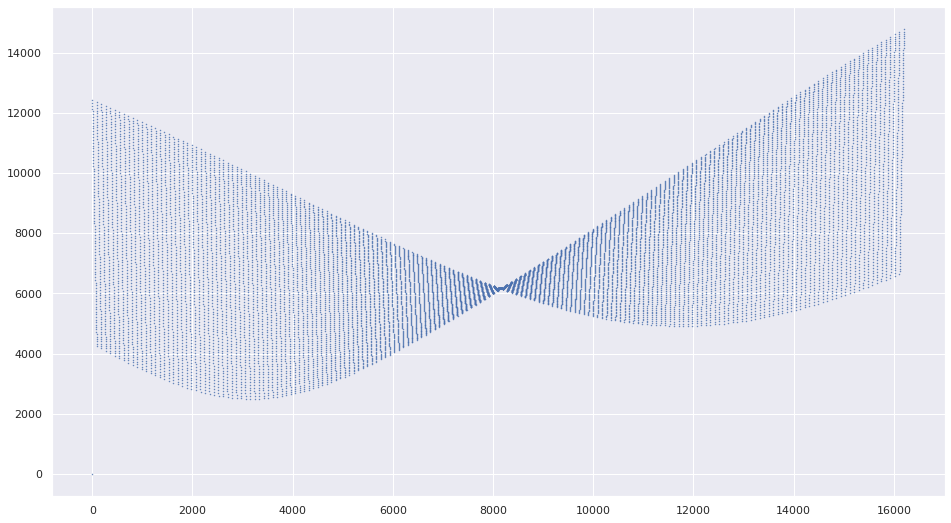

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

def loss_function(lng1,lat1,det_lng,det_lat,target):
    return np.abs(distance_from_longlat_asnumpy_function(lng1,lat1,det_lng,det_lat)-target)


def distance_random_walk_function(lng1,lat1,target = 0,maxter=10000):
    init_loss = 10**-8
    walk = [init_loss]
    for det_lat in range(180):
        for det_lng in range(90):
            step = 1 if np.random.randint(0,2) else -1
            loss = loss_function(lng1,lat1,det_lng,det_lat,target)
            walk.append(loss)
    return walk


expr = distance_random_walk_function(120.12802999999997,30.28708,target=case_distance)
plt.figure(figsize=(16,9))
plt.scatter(range(len(expr)),expr,s=0.2)

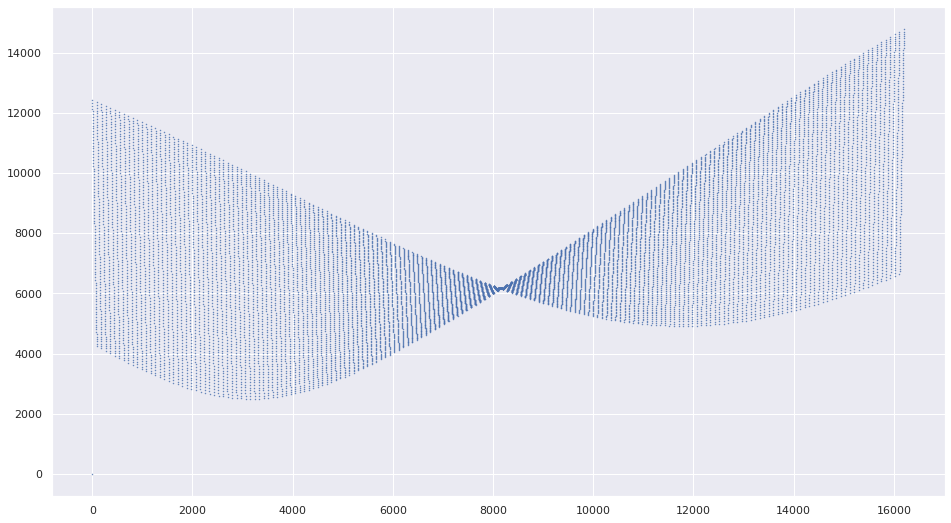

In [6]:
from tqdm import tqdm



'''
def convergence_function(loss_walk):
    return loss_walk[-1]>=loss_walk[-2]
    '''

def distance_random_walk_function(lng1,lat1,target = 0,maxter=10000):
    init_loss = 10**-8
    walk = [init_loss]
    longlat = [[10**-8,10**-8]]
    step_random = lambda : np.random.rand() if np.random.randint(0,2) else -1
    for det_lat in range(180):
        for det_lng in range(90):
            step = 1 if np.random.randint(0,2) else -1
            loss = loss_function(lng1,lat1,det_lng,det_lat,target)
            walk.append(loss)
    return walk


expr = distance_random_walk_function(120.12802999999997,30.28708,target=case_distance)
plt.figure(figsize=(16,9))
plt.scatter(range(len(expr)),expr,s=0.2)

69

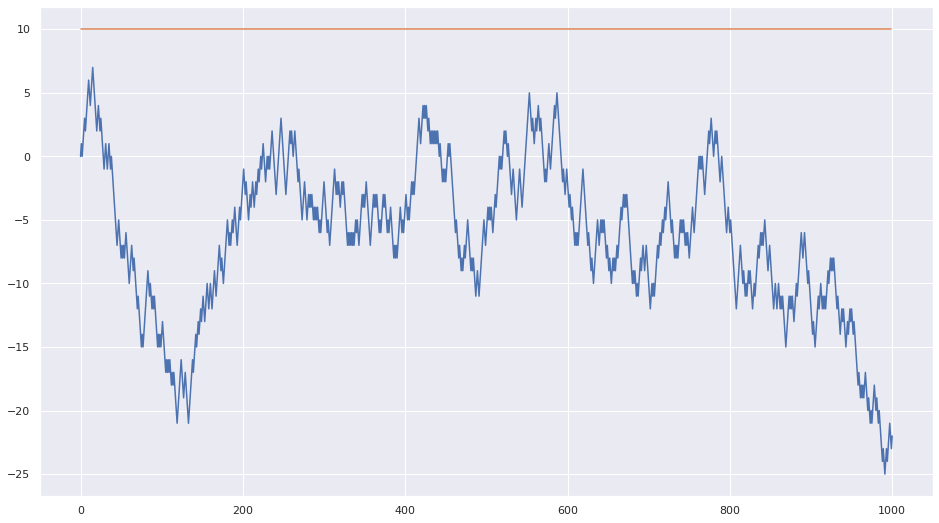

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

position = 0
walk = [position]
steps = 1000  # 累积走的位置数量
expr = 10 # 要求的到达距离
for i in range(steps):
    step = 1 if np.random.randint(0,2) else -1 # 随机前进或者后退一步 1，-1
    position += step # 累积步长
    walk.append(position) 
plt.figure(figsize=(16,9))
plt.plot(walk)
plt.plot(np.full(steps,10))
(np.abs(walk)>expr).argmax()

## 坐标计算两点之间的距离(调包）

In [8]:
#调用geopy包中的方法
from geopy.distance import geodesic
print(geodesic((30.28708,120.12802999999997), (28.7427,115.86572000000001)).m) 
#计算两个坐标直线距离
print(geodesic((30.28708,120.12802999999997), (28.7427,115.86572000000001)).km) 

447249.7993541994
447.24979935419935


# 直线距离检查函数

In [9]:
def straight_line_distance_check_function(lng1,lat1,lng2,lat2):
    numpy_data = distance_from_longlat_asnumpy_function(lng1,lat1,lng2,lat2)
    math_data = distance_from_longlat_asmath_function(lng1,lat1,lng2,lat2)
    geopy_data = geodesic((float(lat1),float(lng1)), (float(lat2),float(lng2))).kilometers
    context = np.r_[numpy_data,math_data,geopy_data]
    return {"numpy":numpy_data,"math":math_data,"geopy":geopy_data,"mean":np.mean(context),"std":np.std(context)}


straight_line_distance_check_function(117.316937, 31.885135, 118.391643, 31.347988)

{'numpy': 117.99692609383423,
 'math': 117.99692609383423,
 'geopy': 118.0908490828045,
 'mean': 118.02823375682432,
 'std': 0.04427572160678822}

# 地理信息采集

## 百度获得地理信息

In [10]:
import requests
import json
import pandas as pd

def get_api_function(*address):
    '''
    调用地图API获取待查询地址专属url
    最高查询次数30w/天，最大并发量160/秒
    '''
    ak = 'Vhzgfjih2w3YY0WUPuPdKiMQKwIor9rp'
    if len(address) < 1:
        return None
    else:
        for add in address:   
            url = 'http://api.map.baidu.com/geocoding/v3/?address={inputAddress}&output=json&ak={myAk}'.format(inputAddress=add,myAk=ak)  
            yield url
            
def get_position_function(url):
    '''返回经纬度信息'''
    res = requests.get(url)
    json_data = json.loads(res.text)

    if json_data['status'] == 0:
        lat = json_data['result']['location']['lat'] #经度
        lng = json_data['result']['location']['lng'] #纬度
        precise = json_data['result']['precise'] #精确性
        confidence = json_data['result']['confidence'] #置信度
        comprehension = json_data['result']['comprehension'] #解释性
        level = json_data['result']['level'] #分类等级
    else:
        print("Error output!")
        return json_data['status']

    
    return lat,lng,precise,confidence,comprehension,level


def get_strings_function(address):
    ''''''
    for add in address:
        add_url = list(get_api_function(add))[0]
        print(add_url)
        try:
            lat,lng,precise,confidence,comprehension,level = get_position_function(add_url) 
            print("地址：{0}|经度:{1}|纬度:{2}|精度:{3}|置信度:{4}|解释性:{5}|分类等级:{6}".format(add,lat,lng,precise,confidence,comprehension,level))
        except Error as e:
            print(e)

def getlonglat_from_baidu_function(address):
    if isinstance(address,str) :
        address = [address]
        
    ''''''
    column = {"地址":[],"经度":[],"纬度":[],"精度":[],"置信度":[],"解释性":[],"分类等级":[]}
    n = -1
    for add in address:
        column["地址"].append(add)
        lat,lng,precise,confidence,comprehension,level  = get_position_function(list(get_api_function(add))[0])
        column["纬度"].append(lat)
        column["经度"].append(lng)
        column["精度"].append(precise)
        column["置信度"].append(confidence)
        column["解释性"].append(comprehension)
        column["分类等级"].append(level)           
    return pd.DataFrame(column)





getlonglat_from_baidu_function("合肥火车站")

,地址,经度,纬度,精度,置信度,解释性,分类等级
0,合肥火车站,117.323619,31.891059,0,50,100,火车站


## 高德地图获得地理信息

In [11]:
def filter_empty(word):
    return None if word == [] else word

def get_location_lng(key,word):
    return {"lat":float(word.split(",")[-1]) if key == "location" else None}

def get_location_lat(key,word):
    return {"lng":float(word.split(",")[0]) if key == "location" else None}

def get_biz_ext_rating(key,word):
    if "rating" in word:
        return {"biz_ext_rating":word["rating"] if key == "biz_ext" else None}
    else:
        return {"biz_ext_rating": None}

def get_biz_ext_cost(key,word):
    if "cost" in word:
        return {"biz_ext_cost":word["cost"] if key == "biz_ext" else None}
    else:
        return {"biz_ext_cost": None}

def get_biz_ext_meal_ordering(key,word):
    if "meal_ordering" in word:
        return {"biz_ext_meal_ordering":word["meal_ordering"] if key == "biz_ext" else None}
    else:
        return {"biz_ext_meal_ordering":None}

def get_biz_ext_open_time(key,word):
    if key == "biz_ext":
        return {"biz_ext_"+k:w for k,w in word.items() if "open" in k}
    return {"biz_ext_open_time":None}

def get_photos(key,word):
    if key == "photos":
        rst = {}
        n = 0
        for ite in word:
            n += 1
            for k,w in ite.items():
                if w == []:
                    rst.update({k+str(n):None})
                rst.update({k+str(n):w})
        return rst
    return {"title":None,"url":None}

def get_suggestion(answer_key,answer_value):
    return {k:filter_empty(w) for k,w in answer_value.items()}

def getlonglat_from_gaode_function(keywords,return_type="simplify"):
    #使用高德API-搜索POI:https://lbs.amap.com/api/webservice/guide/api/search 
    key = '07ac12a00f830764ebfdee2fd0bc96fd' 
    par = {'keywords': keywords, 'key': key,'offset':1} 
    base = 'https://restapi.amap.com/v3/place/text' 
    response = requests.get(base, par)
    answer = response.json() 
    result = {}
    for answer_key,answer_value in answer.items():
        if answer_key== "pois" and answer_value[0]:
            for key,word in answer_value[0].items():
                if word == []:
                    result.update({key:None})
                elif key == "location":
                    result.update(get_location_lng(key,word))
                    result.update(get_location_lat(key,word))
                elif key == "biz_ext":    
                    result.update(get_biz_ext_rating(key,word))
                    result.update(get_biz_ext_cost(key,word))
                    result.update(get_biz_ext_meal_ordering(key,word))
                    result.update(get_biz_ext_open_time(key,word))
                elif key == "photos":
                    result.update(get_photos(key,word))
                else:
                    result.update({key:word}) 
        elif answer_key == "suggestion" and answer_value:
            result.update(get_suggestion(answer_key,answer_value))
    if return_type == "all":
        return pd.DataFrame({k:[w] for k,w in result.items()})
    elif return_type == "simplify":
        return pd.DataFrame({n:[result[n]] for n in  ['name','pname','cityname'
                                                      ,'adname','address','type'
                                                      ,'lng','lat','tel'] if n in result})
    
    
    
address='合肥火车站' 
getlonglat_from_gaode_function(address)

,name,pname,cityname,adname,address,type,lng,lat,tel
0,合肥站,安徽省,合肥市,瑶海区,站前路1号,交通设施服务;火车站;火车站,117.316937,31.885135,0551-64243311


## 高德地图地理信息逆编码，准确度不如上面的结构化数据

In [12]:
import requests
import pandas as pd

#使用高德API-地理/逆地理编码:https://lbs.amap.com/api/webservice/guide/api/georegeo
def geocodeG(address):
    key = '07ac12a00f830764ebfdee2fd0bc96fd'
    par = {'address': address, 'key': key}
    base = 'http://restapi.amap.com/v3/geocode/geo'
    response = requests.get(base, par)
    answer = response.json()
    return answer['geocodes'][0]['location']

address='原阳县酒楼' #非结构化的位置，返回结果不准（结构化的数据效果很好）
print(geocodeG(address))

113.912220,35.386060


# 查询真实两地距离

## 高德地图结构化数据计算两地距离

In [13]:
def calculate_the_distance_with_gaode_map(address_1,address_2):
    search_longlat = []
    for add in (address_1,address_2):
        temp = getlonglat_from_gaode_function(add)
        search_longlat.append(temp.lng)
        search_longlat.append(temp.lat)    
    lng1,lat1,lng2,lat2 =  tuple(search_longlat)
    #print([lng1[0],lat1[0],lng2[0],lat2[0]])
    return {"高德地图结构化数据计算距离":straight_line_distance_check_function(lng1[0],lat1[0],lng2[0],lat2[0])}

calculate_the_distance_with_gaode_map("合肥金域国际","桐城")

{'高德地图结构化数据计算距离': {'numpy': 94.33019904314568,
  'math': 94.33019904314568,
  'geopy': 94.09623963609248,
  'mean': 94.25221257412795,
  'std': 0.11028952216647042}}

# IP 追踪

In [14]:
import geoip2.database
import subprocess
import os
import requests
dataset_path_of_city = "{}{}{}".format(os.getcwd(),os.sep,"GeoLite2-City_20200901/GeoLite2-City.mmdb")


def getLoc(ip,dataset_path_of_city=dataset_path_of_city):
    try:
        reader = geoip2.database.Reader(dataset_path_of_city)
        data = reader.city(ip)
        dict_ = {"ip地址":ip,"国家":data.country.names['en'],"省份":data.subdivisions.most_specific.names['en'],"城市":data.city.names['en'],"纬度":data.location.latitude,"经度":data.location.longitude}
        return dict_
    except Exception as e:
        print("can't find this ip")

def ultratools(IP='67.216.225.172'):
    cookies = {
        'JSESSIONID': 'node0e9xnksern9qs1pm4zttyro5ux319777',
        'cp_ga_li': 'LO',
        '_mkto_trk': 'id:401-EDD-684&token:_mch-ultratools.com-1610457819144-61657',
        '__atuvc': '6%7C2',
        '__atuvs': '5ffda2d9897ed521005',
        '_parrable_id': 'eid%3A01.1610457965.bccb56f2088dae5361b48847f21eb96c572dca95f920cfcbe41be8d7cde225d5507f335dba72b4cf93f45999c8505539a9f368210180ef7c1ca0a03467051a915e39fdf0e29c5dae6ac5',}

    headers = {
        'Connection': 'keep-alive',
        'Cache-Control': 'max-age=0',
        'sec-ch-ua': '"Google Chrome";v="87", " Not;A Brand";v="99", "Chromium";v="87"',
        'sec-ch-ua-mobile': '?0',
        'Upgrade-Insecure-Requests': '1',
        'Origin': 'https://www.ultratools.com',
        'Content-Type': 'application/x-www-form-urlencoded',
        'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 11_0_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/87.0.4280.141 Safari/537.36',
        'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9',
        'Sec-Fetch-Site': 'same-origin',
        'Sec-Fetch-Mode': 'navigate',
        'Sec-Fetch-User': '?1',
        'Sec-Fetch-Dest': 'document',
        'Referer': 'https://www.ultratools.com/tools/geoIpResult',
        'Accept-Language': 'zh-CN,zh;q=0.9',
        }

    data = {'ipAddress': IP}

    response = requests.post('https://www.ultratools.com/tools/geoIpResult', headers=headers, cookies=cookies, data=data)
    for line in response.text.splitlines():
        print(line)


if __name__ == "__main__":
    print("please input a IP number in here")
    input_ = '67.216.225.172'#input()
    print(getLoc(input_))
    #print(ultratools(input_))


please input a IP number in here
can't find this ip
None


In [1]:
import requests
import time
import pandas as pd
import subprocess


def location(IP):
    try:
        url="https://m.ip138.com/iplookup.asp?ip="  
        kv = {'user-agent':'Mozilla/5.0'}
        r  = requests.get(url + IP, headers = kv)
        #print(r.status_code)
        r.encoding = r.apparent_encoding
        #print(r.request.headers)
        return pd.read_html(r.text)[0][0:1].to_numpy()[0]#[-2000:-1000])
    except Exception as e:
        return r.text
if __name__ == "__main__":
    cmd = subprocess.getoutput("curl cip.cc")
    myip = [i for i in cmd.splitlines() if 'IP' in i][0][5:]
    print("网络查询接口：")
    print(location(myip))
    print("命令查询：")
    print(cmd)




网络查询接口：
['ASN归属地' '安徽省合肥市 移动']
命令查询：
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100   143    0   143    0     0   1606      0 --:--:-- --:--:-- --:--:--  1625
IP	: 112.32.3.244
地址	: 中国  安徽  移动

数据二	: 安徽省池州市 | 移动

数据三	: 

URL	: http://www.cip.cc/112.32.3.244


In [16]:
server_ip = subprocess.getoutput("curl cip.cc").splitlines()[-8].split(":")[-1].replace(" ","")
tcpdump_ips = subprocess.getoutput("sudo tcpdump -i any -c5 tcp")


In [17]:
server_ip
tcpdump_ips.splitlines()

['tcpdump: verbose output suppressed, use -v or -vv for full protocol decode',
 'listening on any, link-type LINUX_SLL (Linux cooked v1), capture size 262144 bytes',
 '22:42:27.400097 IP 64.64.249.161.16clouds.com.38282 > hwhk.ssh: Flags [.], ack 2317432691, win 4109, options [nop,nop,TS val 2401032868 ecr 3131326863], length 0',
 '22:42:27.402607 IP 64.64.249.161.16clouds.com.38282 > hwhk.ssh: Flags [.], ack 1473, win 4109, options [nop,nop,TS val 2401032873 ecr 3131326870], length 0',
 '22:42:27.540026 IP hwhk.35722 > 122.51.162.249.http: Flags [F.], seq 1052112970, ack 2242605049, win 501, length 0',
 '22:42:27.568615 IP 122.51.162.249.http > hwhk.35722: Flags [F.], seq 1, ack 1, win 58, length 0',
 '22:42:27.568629 IP hwhk.35722 > 122.51.162.249.http: Flags [.], ack 2, win 501, length 0',
 '5 packets captured',
 '6 packets received by filter',
 '0 packets dropped by kernel']

In [18]:
from IPython.display import IFrame

def display_map_from_ip(IP):
    url = "https://www.ipuu.net/#/query?category=ip&queryValue="+IP+"&selectedProp=location&activeLocationVersion=0"
    return IFrame(src=url, width=1920, height=1080)#,url

display_map_from_ip("172.16.12.38")